In [414]:
import numpy as np
from GSVA import gsva
import seaborn as sns
import pandas as pd
from cmapPy.pandasGEXpress.parse_gct import parse
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [415]:
#Read the GCT file
file = parse(r'C:\Users\Mahe\Desktop\Elucidata\PAAD.gct',).data_df
column_data = parse(r'C:\Users\Mahe\Desktop\Elucidata\PAAD.gct', col_meta_only = True ).T
print(column_data)
#Find number of genes with NaN values
no_of_rows = file.shape[0]

cid                                               aab1-Primary solid Tumor  \
chd                                                                          
participant_id                                                        aab1   
sample_type                                            Primary solid Tumor   
mRNAseq_cluster                                                          1   
bcr_patient_barcode                                           tcga-2j-aab1   
bcr_patient_uuid                      75119d1a-93e5-4ae7-9d60-69ee929a0772   
...                                                                    ...   
withdrawn                                                            false   
year_of_dcc_upload                                                    2016   
year_of_form_completion                                               2014   
year_of_initial_pathologic_diagnosis                                  2012   
year_of_tobacco_smoking_onset                                   

In [416]:
#Remove rows with atleast one NaN value
file=file.set_index(file.axes[0]) 
file =file.dropna()
new_no_of_rows=file.shape[0]
print('Number of genes with NaN values: ', no_of_rows-new_no_of_rows)

file.head()




Number of genes with NaN values:  4367


cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,...,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,...,9.10,9.50,10.0,9.50,9.1,10.50,9.8,10.80,8.3,9.00


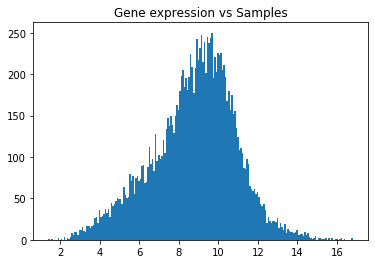

In [417]:
#Gene expression distribution across all samples for each gene
gene_means = file.mean(axis=1)
plt.figure()
plt.hist(gene_means, bins =int(200))
plt.title('Gene expression vs Samples')
file =file.transpose()


The distribution of gene expression appears to be a normal distribution with some skewness

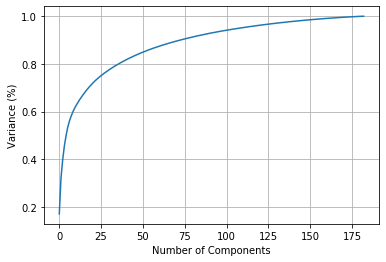

In [418]:
#Visualze the data using PCA
outputPCA = PCA().fit(file)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(outputPCA.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

In [419]:
#Choosing 100 components and applying PCA 
n1 = 100
n2 = 125
pca1 = PCA(n1)
pca2 = PCA(n2)
df1 = pca1.fit_transform(file)
df2 = pca2.fit_transform(file)
#Variance of the PCA
total_variance_100= pca1.explained_variance_ratio_.cumsum()
total_variance_125 = pca2.explained_variance_ratio_.cumsum()
#print('Total Variance with 100 components: ', total_variance_100)
#print('Total Variance with 125 components: ', total_variance_125)


There is a total variance of ~93% when no of components chosen is 100.
When no of components is increased (to 120), total variance is ~96%. (From the last elemenst of cumsum matrix)

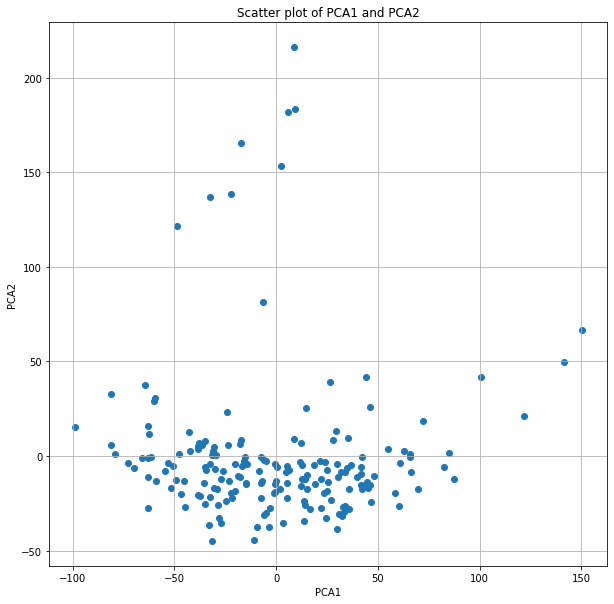

In [420]:
#Generating a dataframe for the components
DF=pd.DataFrame(df2,columns=['PCA'+str(i) for i in range(1,n2+1)], index=None)
#Visualize the data using PCA
plt.figure(figsize=(10, 10))
plt.scatter(DF['PCA1'],DF['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Scatter plot of PCA1 and PCA2')
plt.grid()
plt.show()





It is possible to separate neuroendocrine tumors from adenocarcinoma tumors, but not completely as some overlap may be present.

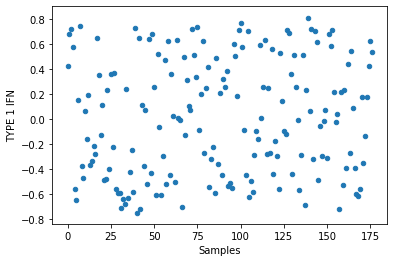

In [491]:

#Task 3
# Plot gene expression values for type-1 IFN genes for pancreatic carcinoma 
expression_df_file = 'C:/Users/Mahe/Desktop/Elucidata/PAAD.gct'

expression_df = pd.read_table(expression_df_file, delimiter='\t', skiprows=2, header=None)

expression_df.set_index(0, inplace=True)

columns = expression_df.columns
#Retain only pancreatic carcinoma samples
for col in columns:
    histological_type = str(expression_df[col]['histological_type'])
    if 'pancreas-adenocarcinoma' not in histological_type:
        del expression_df[col]

expression_df.reset_index(inplace=True)

expression_df = expression_df.iloc[125:, :]

expression_df.set_index(0, inplace=True)

expression_df.rename(columns = lambda x:'S-'+str(x), inplace=True)

genesets_df_file = 'C:/Users/Mahe/Desktop/Elucidata/type1_IFN.txt'

genesets_df = pd.read_csv(genesets_df_file, header=None)

genesets_df.rename(columns={0:'member'}, inplace=True)

genesets_df['description'] = 'description'

genesets_df['name'] = 'TYPE 1 IFN'
#pathways_df = gsva(expression_df,genesets_df, verbose=True)

output  = pd.read_csv('C:/Users/Mahe/Desktop/Elucidata/output_pathways.csv').set_index('name')
#Scatter plot of the GSVA scores
output =output.transpose().reset_index()
output['Samples'] = pd.Series(range(177))
plot1 = output.plot.scatter(y='TYPE 1 IFN', x='Samples')



Genes with a higher GSVA score in a certain sample have a higher expression in that sample than the remaining genes. A more negative GSVA score for the same sample would mean that the rest of the genes (total no.of genes - 25 IFN genes) are expressed more in that particular tumor sample.
Say, we want to study the effect of alcohol on the onset of pancreatic adenocarcinoma. Two parameters, namely 'alcoholic_exposure_category' and 'amount_of_alcohol_consumption_per_day' can be considered. The GSVA scores can be calculated for the 25 IFN genes for these two parameters.The points in the resulting scatter plot can be classified into mutiple groups based on a threshold.

